In [3]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.core import datetools
from pandas import Series, DataFrame
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
from pmdarima.arima import auto_arima

C:\Users\Acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [4]:
data=pd.read_excel("Economic_acvtivity_index_Armenia.xls")

In [5]:
data.head()

,Տնտեսական ակտիվության ցուցանիշ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
NaN,NaN,Շղթայակապ ինդեքսներ (2009=100),Շղթայակապ ինդեքսներ (2010=100),Շղթայակապ ինդեքսներ (2011=100),Շղթայակապ ինդեքսներ (2012=100),Շղթայակապ ինդեքսներ (2013=100),Շղթայակապ ինդեքսներ (2014=100),Շղթայակապ ինդեքսներ (2015=100),Շղթայակապ ինդեքսներ (2016=100),Շղթայակապ ինդեքսներ (2017=100),"Նախորդ ամսվա նկատմամբ, %","Նախորդ տարվա նույն ամսվա նկատմամբ, %","Նախորդ տարվա նույն ժամանակա-շրջանի նկատմամբ, ա..."
2010.0,Հունվար,59.0466,x,x,x,x,x,x,x,x,43.9562,102.169,102.169
NaN,Փետրվար,64.211,x,x,x,x,x,x,x,x,108.746,102.65,102.419
NaN,Մարտ,76.5161,x,x,x,x,x,x,x,x,119.164,106.947,104.107
NaN,Ապրիլ,74.1026,x,x,x,x,x,x,x,x,96.8458,112.739,106.309


In [6]:
data=data[["Տնտեսական ակտիվության ցուցանիշ",'Unnamed: 10']]
data.head()

,Տնտեսական ակտիվության ցուցանիշ,Unnamed: 10
NaN,NaN,"Նախորդ ամսվա նկատմամբ, %"
2010.0,Հունվար,43.9562
NaN,Փետրվար,108.746
NaN,Մարտ,119.164
NaN,Ապրիլ,96.8458


In [7]:
data=data.iloc[1:,:]
data=data.iloc[:-11,:]

In [8]:
data.tail()

,Տնտեսական ակտիվության ցուցանիշ,Unnamed: 10
NaN,Սեպտեմբեր,108.876
NaN,Հոկտեմբեր,92.5633
NaN,Նոյեմբեր,88.8207
NaN,Դեկտեմբեր,121.799
2018.0,Հունվար,52.3941


In [9]:
date = pd.period_range(start='1/1/2010', end='1/1/2018', freq='M')
data['Date'] = date
data.set_index('Date',inplace=True)
data.drop('Տնտեսական ակտիվության ցուցանիշ',axis=1, inplace=True)

In [10]:
data.columns=["GDP"]
data.head()

,GDP
Date,
2010-01,43.9562
2010-02,108.746
2010-03,119.164
2010-04,96.8458
2010-05,111.361


In [11]:
data.isnull().any()

GDP    False
dtype: bool

In [12]:
data.to_csv("GDP.csv")
data=pd.read_csv( "GDP.csv",header=0, parse_dates=[0], index_col=0, squeeze=True)

In [13]:
data.head()

Date
2010-01-01     43.956171
2010-02-01    108.746355
2010-03-01    119.163571
2010-04-01     96.845785
2010-05-01    111.360552
Name: GDP, dtype: float64

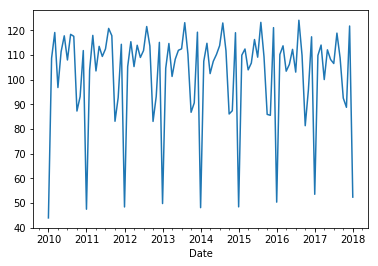

In [14]:
data.plot()
plt.show()
# the graph shows that the data is seasonal so we should apply Sarima model

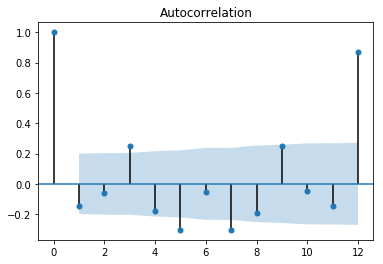

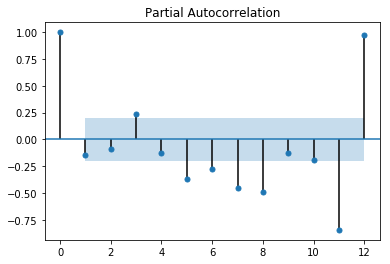

In [15]:
plot_acf(data,lags=12)
plot_pacf(data,lags=12)
plt.show()

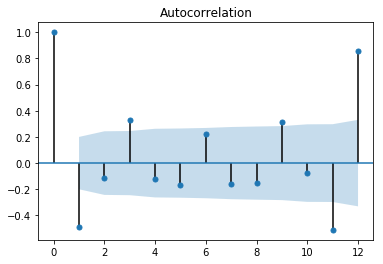

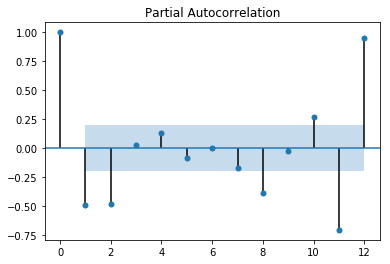

In [16]:
diff = data.diff(periods=1)
diff.dropna(inplace=True)
plot_acf(diff,lags=12)
plot_pacf(diff,lags=12)
plt.show()

In [76]:
print (data.std())
print (diff.std())

19.166544973082335
28.78533344513923


in the pacf plots the negative correlation for lag 1 shows that we do not need an AR term but we do need an MA term.
the higher standard deviation for the difference compared to otiginal series shows that no differencing is needed.
so I think we should use (0,0,1) for the model, but let's try some combinations and compare.

In [77]:
params = []
p_params = [0, 1]
d_params = [0, 1]
q_params = [0, 1]
for p in p_params:
    for d in d_params:
        for q in q_params:
            cfg=(p,d,q)
            params.append(cfg)

P_params = [0, 1]
D_params = [0, 1]
Q_params = [0, 1]
m_params = 12
seasonal=[]
for P in P_params:
    for D in D_params:
        for Q in Q_params:
                cfg = (P,D,Q,m_params)
                seasonal.append(cfg)
t_params = ['n','c','t','ct']

In [80]:
total_list=[]
my_table=pd.DataFrame(columns=["p","s","t","AIC"])
for p in params:
    for s in seasonal:
        for t in t_params:
            my_list=[]
            my_list.append(p)
            my_list.append(s)
            my_list.append(t)
            model = sm.tsa.statespace.SARIMAX(data,order=p,seasonal_order=s,trend=t,
                                              enforce_invertibility=False,enforce_stationarity=False)
            results = model.fit()
            my_list.append(results.aic)
            print(my_list)
            

C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (0, 0, 0, 12), 'n', 1155.1299250612017]
[(0, 0, 0), (0, 0, 0, 12), 'c', 834.6056831052009]
[(0, 0, 0), (0, 0, 0, 12), 't', 1036.770185901729]
[(0, 0, 0), (0, 0, 0, 12), 'ct', 836.180262637988]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (0, 0, 1, 12), 'n', 1012.8196242480939]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (0, 0, 1, 12), 'c', 732.1553430402646]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (0, 0, 1, 12), 't', 882.2815455261994]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (0, 0, 1, 12), 'ct', 733.9027378959773]
[(0, 0, 0), (0, 1, 0, 12), 'n', 439.109268361917]
[(0, 0, 0), (0, 1, 0, 12), 'c', 441.10744665979144]
[(0, 0, 0), (0, 1, 0, 12), 't', 441.1075475975355]
[(0, 0, 0), (0, 1, 0, 12), 'ct', 443.10741315991066]
[(0, 0, 0), (0, 1, 1, 12), 'n', 368.9802787583977]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (0, 1, 1, 12), 'c', 370.92588809843096]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (0, 1, 1, 12), 't', 370.97546644241027]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (0, 1, 1, 12), 'ct', 372.69763446581624]
[(0, 0, 0), (1, 0, 0, 12), 'n', 447.2389764600761]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (1, 0, 0, 12), 'c', 447.1927024271536]
[(0, 0, 0), (1, 0, 0, 12), 't', 448.6616905973552]

C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



[(0, 0, 0), (1, 0, 0, 12), 'ct', 449.1696787682219]
[(0, 0, 0), (1, 0, 1, 12), 'n', 437.3276100872546]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (1, 0, 1, 12), 'c', 447.4526308809085]
[(0, 0, 0), (1, 0, 1, 12), 't', 438.7616814577657]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (1, 0, 1, 12), 'ct', 439.1641525706376]
[(0, 0, 0), (1, 1, 0, 12), 'n', 374.8236409478036]
[(0, 0, 0), (1, 1, 0, 12), 'c', 376.77899686097385]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (1, 1, 0, 12), 't', 376.82032526157457]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (1, 1, 0, 12), 'ct', 378.59373899882934]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (1, 1, 1, 12), 'n', 369.4999293953532]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (1, 1, 1, 12), 'c', 371.4252301150998]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (1, 1, 1, 12), 't', 371.4900185302263]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 0), (1, 1, 1, 12), 'ct', 373.07822329410726]
[(0, 0, 1), (0, 0, 0, 12), 'n', 1056.7187012441445]
[(0, 0, 1), (0, 0, 0, 12), 'c', 825.6121132737745]
[(0, 0, 1), (0, 0, 0, 12), 't', 967.8558074895791]

C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



[(0, 0, 1), (0, 0, 0, 12), 'ct', 827.3230831543138]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (0, 0, 1, 12), 'n', 848.2554162950225]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (0, 0, 1, 12), 'c', 723.443640933167]
[(0, 0, 1), (0, 0, 1, 12), 't', 763.4266626407366]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (0, 0, 1, 12), 'ct', 725.7171033879343]
[(0, 0, 1), (0, 1, 0, 12), 'n', 416.8107362573224]
[(0, 0, 1), (0, 1, 0, 12), 'c', 418.81049708367135]
[(0, 0, 1), (0, 1, 0, 12), 't', 418.809440207664]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (0, 1, 0, 12), 'ct', 420.79458646972347]
[(0, 0, 1), (0, 1, 1, 12), 'n', 354.2074048001397]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (0, 1, 1, 12), 'c', 356.10725402842843]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (0, 1, 1, 12), 't', 356.1996934912447]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (0, 1, 1, 12), 'ct', 357.6609675922009]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 0, 0, 12), 'n', 430.05601640629544]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 0, 0, 12), 'c', 425.5364423797212]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 0, 0, 12), 't', 431.33879356465144]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 0, 0, 12), 'ct', 428.0028057920314]
[(0, 0, 1), (1, 0, 1, 12), 'n', 420.54732280739483]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 0, 1, 12), 'c', 414.33311924441176]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 0, 1, 12), 't', 421.7188329501235]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 0, 1, 12), 'ct', 420.1071347293265]
[(0, 0, 1), (1, 1, 0, 12), 'n', 363.57300311752545]
[(0, 0, 1), (1, 1, 0, 12), 'c', 365.4235036123549]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 1, 0, 12), 't', 365.56243033807567]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 1, 0, 12), 'ct', 366.7427468019032]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 1, 1, 12), 'n', 355.4908601413239]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 1, 1, 12), 'c', 357.33127140236473]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 0, 1), (1, 1, 1, 12), 't', 357.4776105903341]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Use

[(0, 0, 1), (1, 1, 1, 12), 'ct', 358.56343789360903]
[(0, 1, 0), (0, 0, 0, 12), 'n', 900.3245841273956]
[(0, 1, 0), (0, 0, 0, 12), 'c', 902.2672733094548]
[(0, 1, 0), (0, 0, 0, 12), 't', 902.2263126180807]
[(0, 1, 0), (0, 0, 0, 12), 'ct', 904.2214158166488]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (0, 0, 1, 12), 'n', 715.7999943535601]
[(0, 1, 0), (0, 0, 1, 12), 'c', 717.7178217529206]
[(0, 1, 0), (0, 0, 1, 12), 't', 717.6897155082262]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (0, 0, 1, 12), 'ct', 719.6888799875582]
[(0, 1, 0), (0, 1, 0, 12), 'n', 520.754036951974]
[(0, 1, 0), (0, 1, 0, 12), 'c', 522.7540366100565]
[(0, 1, 0), (0, 1, 0, 12), 't', 522.7530766703499]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (0, 1, 0, 12), 'ct', 524.7477730602267]
[(0, 1, 0), (0, 1, 1, 12), 'n', 435.7123085338009]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (0, 1, 1, 12), 'c', 437.7033061816184]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (0, 1, 1, 12), 't', 437.70727325175875]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (0, 1, 1, 12), 'ct', 439.69874489088414]
[(0, 1, 0), (1, 0, 0, 12), 'n', 527.8186270051891]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (1, 0, 0, 12), 'c', 529.815975714909]
[(0, 1, 0), (1, 0, 0, 12), 't', 529.816713600405]

C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



[(0, 1, 0), (1, 0, 0, 12), 'ct', 531.7658268832249]
[(0, 1, 0), (1, 0, 1, 12), 'n', 514.2009498368761]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (1, 0, 1, 12), 'c', 516.1963543507657]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (1, 0, 1, 12), 't', 516.198382611122]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (1, 0, 1, 12), 'ct', 518.1945899260179]
[(0, 1, 0), (1, 1, 0, 12), 'n', 444.41284548949415]
[(0, 1, 0), (1, 1, 0, 12), 'c', 446.412782310225]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (1, 1, 0, 12), 't', 446.41281837149467]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (1, 1, 0, 12), 'ct', 448.412734145115]
[(0, 1, 0), (1, 1, 1, 12), 'n', 436.86718215506716]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (1, 1, 1, 12), 'c', 438.86609321983843]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (1, 1, 1, 12), 't', 438.6038685163135]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0), (1, 1, 1, 12), 'ct', 440.60380669400814]
[(0, 1, 1), (0, 0, 0, 12), 'n', 822.2919276498556]
[(0, 1, 1), (0, 0, 0, 12), 'c', 823.8752447071597]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 0, 0, 12), 't', 823.8980066803053]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 0, 0, 12), 'ct', 825.8753286127259]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 0, 1, 12), 'n', 644.9138145247174]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 0, 1, 12), 'c', 646.5368833817553]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 0, 1, 12), 't', 646.5789103282472]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 0, 1, 12), 'ct', 648.5294048860883]
[(0, 1, 1), (0, 1, 0, 12), 'n', 431.771441447778]
[(0, 1, 1), (0, 1, 0, 12), 'c', 433.7038806402554]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 1, 0, 12), 't', 433.67004729393574]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 1, 0, 12), 'ct', 435.60643087776697]
[(0, 1, 1), (0, 1, 1, 12), 'n', 363.1745695360674]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 1, 1, 12), 'c', 365.15276019282936]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (0, 1, 1, 12), 't', 367.3190517075628]
[(0, 1, 1), (0, 1, 1, 12), 'ct', 369.80140826466584]
[(0, 1, 1), (1, 0, 0, 12), 'n', 447.3652810855042]

C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



[(0, 1, 1), (1, 0, 0, 12), 'c', 449.34255227091666]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 0, 0, 12), 't', 449.32589949177765]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 0, 0, 12), 'ct', 451.96032793423973]
[(0, 1, 1), (1, 0, 1, 12), 'n', 430.7401089597148]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 0, 1, 12), 'c', 432.74007527830423]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 0, 1, 12), 't', 443.21934346932125]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 0, 1, 12), 'ct', 435.35026486795533]
[(0, 1, 1), (1, 1, 0, 12), 'n', 376.8953244833777]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 1, 0, 12), 'c', 378.7131304479347]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 1, 0, 12), 't', 380.39126037172247]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 1, 0, 12), 'ct', 380.844200016002]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 1, 1, 12), 'n', 365.76225598915516]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 1, 1, 12), 'c', 367.49150476393675]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 1, 1, 12), 't', 370.61572813649116]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 1), (1, 1, 1, 12), 'ct', 371.57782388994497]
[(1, 0, 0), (0, 0, 0, 12), 'n', 908.7821447397525]
[(1, 0, 0), (0, 0, 0, 12), 'c', 834.1605844472633]
[(1, 0, 0), (0, 0, 0, 12), 't', 907.3318798075042]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (0, 0, 0, 12), 'ct', 835.6703943433752]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (0, 0, 1, 12), 'n', 798.0328290186158]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (0, 0, 1, 12), 'c', 731.9173835205057]
[(1, 0, 0), (0, 0, 1, 12), 't', 722.0000040293628]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (0, 0, 1, 12), 'ct', 656.4849407922429]
[(1, 0, 0), (0, 1, 0, 12), 'n', 425.30532755542134]
[(1, 0, 0), (0, 1, 0, 12), 'c', 427.30517012083186]
[(1, 0, 0), (0, 1, 0, 12), 't', 427.29947091794327]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (0, 1, 0, 12), 'ct', 429.2793986235119]
[(1, 0, 0), (0, 1, 1, 12), 'n', 356.75983110484873]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (0, 1, 1, 12), 'c', 358.6569183269579]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (0, 1, 1, 12), 't', 358.757324538018]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (0, 1, 1, 12), 'ct', 360.05761142519583]
[(1, 0, 0), (1, 0, 0, 12), 'n', 427.220409526821]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 0, 0, 12), 'c', 423.8758812568055]
[(1, 0, 0), (1, 0, 0, 12), 't', 428.60470176043043]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 0, 0, 12), 'ct', 660.2438488102731]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 0, 1, 12), 'n', 427.3627919558691]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 0, 1, 12), 'c', 457.08885645097496]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 0, 1, 12), 't', 428.4441846688174]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 0, 1, 12), 'ct', 597.4318189388947]
[(1, 0, 0), (1, 1, 0, 12), 'n', 357.12906012087166]
[(1, 0, 0), (1, 1, 0, 12), 'c', 359.03409840285525]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 1, 0, 12), 't', 359.1275146031267]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 1, 0, 12), 'ct', 360.41903829587983]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 1, 1, 12), 'n', 357.2827112772105]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 1, 1, 12), 'c', 359.1249427282875]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 1, 1, 12), 't', 359.27106319816994]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 0), (1, 1, 1, 12), 'ct', 360.24307542296407]
[(1, 0, 1), (0, 0, 0, 12), 'n', 832.9459632410524]
[(1, 0, 1), (0, 0, 0, 12), 'c', 827.9013964115853]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 0, 0, 12), 't', 835.595901167424]
[(1, 0, 1), (0, 0, 0, 12), 'ct', 829.6106314471684]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 0, 1, 12), 'n', 733.3088921156057]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 0, 1, 12), 'c', 733.6807976474274]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 0, 1, 12), 't', 767.3775622263014]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 0, 1, 12), 'ct', 736.7746711830412]
[(1, 0, 1), (0, 1, 0, 12), 'n', 418.43084139361525]
[(1, 0, 1), (0, 1, 0, 12), 'c', 420.37332359737314]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 1, 0, 12), 't', 420.4196184451771]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 1, 0, 12), 'ct', 419.5571776076445]
[(1, 0, 1), (0, 1, 1, 12), 'n', 353.8406030122269]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 1, 1, 12), 'c', 355.80129880183387]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 1, 1, 12), 't', 355.8405671130198]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (0, 1, 1, 12), 'ct', 357.4965438579944]
[(1, 0, 1), (1, 0, 0, 12), 'n', 426.5949948143159]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 0, 0, 12), 'c', 440.71728365667553]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 0, 0, 12), 't', 433.2006296049923]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 0, 0, 12), 'ct', 487.39041594188467]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 0, 1, 12), 'n', 416.7019184240643]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 0, 1, 12), 'c', 444.7507340814293]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 0, 1, 12), 't', 427.89321909157127]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 0, 1, 12), 'ct', 540.612081873019]
[(1, 0, 1), (1, 1, 0, 12), 'n', 359.04881318344695]
[(1, 0, 1), (1, 1, 0, 12), 'c', 360.95970926071806]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 1, 0, 12), 't', 361.0476518980089]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 1, 0, 12), 'ct', 362.36316073019316]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 1, 1, 12), 'n', 354.3244353080999]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 1, 1, 12), 'c', 356.19308829345084]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 0, 1), (1, 1, 1, 12), 't', 356.2875251783879]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Use

[(1, 0, 1), (1, 1, 1, 12), 'ct', 357.5783449109829]
[(1, 1, 0), (0, 0, 0, 12), 'n', 869.821834622026]
[(1, 1, 0), (0, 0, 0, 12), 'c', 871.7575453376936]
[(1, 1, 0), (0, 0, 0, 12), 't', 871.7333728597505]
[(1, 1, 0), (0, 0, 0, 12), 'ct', 873.7332296578875]
[(1, 1, 0), (0, 0, 1, 12), 'n', 681.7718161355831]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (0, 0, 1, 12), 'c', 683.6034005791244]
[(1, 1, 0), (0, 0, 1, 12), 't', 683.6694565770663]

C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (0, 0, 1, 12), 'ct', 685.5901462874222]
[(1, 1, 0), (0, 1, 0, 12), 'n', 473.689679262746]
[(1, 1, 0), (0, 1, 0, 12), 'c', 475.66366210138796]
[(1, 1, 0), (0, 1, 0, 12), 't', 475.67944360764415]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (0, 1, 0, 12), 'ct', 477.6498845492557]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (0, 1, 1, 12), 'n', 386.5118958027318]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (0, 1, 1, 12), 'c', 388.4706921127704]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (0, 1, 1, 12), 't', 388.4768125349023]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (0, 1, 1, 12), 'ct', 390.47039419529375]
[(1, 1, 0), (1, 0, 0, 12), 'n', 472.8594432760398]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 0, 0, 12), 'c', 474.8456033544771]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 0, 0, 12), 't', 474.85708270465426]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 0, 0, 12), 'ct', 476.8234637954926]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 0, 1, 12), 'n', 469.0428135386105]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 0, 1, 12), 'c', 470.99465093812984]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 0, 1, 12), 't', 471.0153487070615]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 0, 1, 12), 'ct', 472.9754166725998]
[(1, 1, 0), (1, 1, 0, 12), 'n', 388.21046151103707]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 1, 0, 12), 'c', 390.1881275376905]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 1, 0, 12), 't', 390.19059713377635]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 1, 0, 12), 'ct', 392.19282990650805]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 1, 1, 12), 'n', 382.6857937372535]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 1, 1, 12), 'c', 384.6677895414236]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 1, 1, 12), 't', 384.6151475245723]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 0), (1, 1, 1, 12), 'ct', 386.5273918480766]
[(1, 1, 1), (0, 0, 0, 12), 'n', 821.9817434455252]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 0, 0, 12), 'c', 823.5027588555006]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 0, 0, 12), 't', 823.5633836764572]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 0, 0, 12), 'ct', 825.4931576811867]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 0, 1, 12), 'n', 643.3956529069959]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 0, 1, 12), 'c', 644.9601021367378]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 0, 1, 12), 't', 645.0496754260759]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 0, 1, 12), 'ct', 650.35644094898]
[(1, 1, 1), (0, 1, 0, 12), 'n', 417.40631290026914]
[(1, 1, 1), (0, 1, 0, 12), 'c', 419.29887716295656]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 1, 0, 12), 't', 419.56941001289096]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 1, 0, 12), 'ct', 422.3671629261356]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 1, 1, 12), 'n', 352.10083465472326]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 1, 1, 12), 'c', 354.03469358170025]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 1, 1, 12), 't', 353.9390469005261]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (0, 1, 1, 12), 'ct', 357.19352367073134]
[(1, 1, 1), (1, 0, 0, 12), 'n', 424.2731910168623]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 0, 0, 12), 'c', 479.3714947470203]
[(1, 1, 1), (1, 0, 0, 12), 't', 426.2504413187147]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 0, 0, 12), 'ct', 427.3844786680993]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 0, 1, 12), 'n', 414.8578820910411]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 0, 1, 12), 'c', 416.85709598969845]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 0, 1, 12), 't', 416.82397203416895]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 0, 1, 12), 'ct', 425.10093577290564]
[(1, 1, 1), (1, 1, 0, 12), 'n', 358.5899361814754]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 1, 0, 12), 'c', 360.130299719494]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 1, 0, 12), 't', 360.0700236251236]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 1, 0, 12), 'ct', 362.7457650890937]
[(1, 1, 1), (1, 1, 1, 12), 'n', 354.52505018709564]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 1, 1, 12), 'c', 355.85060677319217]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 1, 1, 12), 't', 359.68400271886134]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(1, 1, 1), (1, 1, 1, 12), 'ct', 359.40347320108367]


C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1.[(0, 0, 1), (0, 1, 1, 12), 'n', 354.2074048001397]

2.[(1, 0, 1), (0, 1, 1, 12), 'n', 353.8406030122269]

3.[(1, 1, 1), (0, 1, 1, 12), 'n', 352.10083465472326]
 
based on AIC, the best models having min Aic are the ones above. From this three I will choose the first one as it corresponds to my insight based on the acf and pacf graphs.


In [17]:
#the summary of the model chosen
model=sm.tsa.statespace.SARIMAX(data,order=(0,0,1),seasonal_order=(0,1,1,12),trend='n',enforce_invertibility=False,enforce_stationarity=False)
results=model.fit()
print(results.summary())

C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                GDP   No. Observations:                   97
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -176.327
Date:                            Fri, 08 Mar 2019   AIC                            358.653
Time:                                    22:18:32   BIC                            365.441
Sample:                                01-01-2010   HQIC                           361.352
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4314      0.110     -3.917      0.000      -0.647      -0.216
ma.S.L12      -0.1937      0.150   

In [18]:
#trying to forecast GDP for the next 6 months
results.forecast(steps=6)

2018-02-01    109.508551
2018-03-01    113.981174
2018-04-01    100.746267
2018-05-01    111.026810
2018-06-01    109.118853
2018-07-01    106.172047
Freq: MS, dtype: float64